# What is the most popular Scraping technique ?

Let's find out what's the most searched Scraping technique on Google!

* pytrends documentation: https://pypi.org/project/pytrends/
* selenium documentation: https://selenium-python.readthedocs.io/
* BeautifulSoup documentation : https://www.crummy.com/software/BeautifulSoup/bs4/doc/
* mechanicalsoup documentation : https://mechanicalsoup.readthedocs.io/en/stable/
* newspaper documentation : https://newspaper.readthedocs.io/en/latest/

## Installing Libraries

In [52]:
!pip3 install pytrends

## Importing Libraries

Google Trends since 2006 has been open for public to search for relative popularity of certain keyword(s) that can go further back to 2004. From this Google data we can tell stories about the relative popularity over time and between different countries or regions.

I’m using Python to connect to Google Trends API using Pytrends, iterate the data collection over the list of keywords and integrate them using a keyword as reference. We need to do so because Google Trends only allow maximum of 5 keywords comparison at a time.

In [53]:
from pytrends.request import TrendReq

#make a pytrends object to request Google Trends data
pytrends = TrendReq(hl='en-US')     
                
#extract data about weekly searches of certain keywords
keywords = ["Selenium", "Mechanicalsoup", "Beautifulsoup", "Newspaper3k"]
pytrends.build_payload(keywords, timeframe='today 5-y')

In [54]:
#store kewords data
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)


In [55]:
data.describe()

,Selenium,Mechanicalsoup,Beautifulsoup,Newspaper3k
count,260.000000,260.0,260.000000,260.0
mean,81.642308,0.0,3.284615,0.0
std,9.200834,0.0,0.798015,0.0
min,54.000000,0.0,1.000000,0.0
25%,76.000000,0.0,3.000000,0.0
50%,83.500000,0.0,3.000000,0.0
75%,89.000000,0.0,4.000000,0.0
max,100.000000,0.0,5.000000,0.0


In [56]:
data.sample(5)

,Selenium,Mechanicalsoup,Beautifulsoup,Newspaper3k
date,,,,
2016-07-10,72,0,2,0
2019-01-20,89,0,2,0
2021-01-17,67,0,3,0
2021-01-10,64,0,2,0
2017-04-23,83,0,2,0


In [57]:
data.tail(5)

,Selenium,Mechanicalsoup,Beautifulsoup,Newspaper3k
date,,,,
2020-12-27,55,0,3,0
2021-01-03,62,0,3,0
2021-01-10,64,0,2,0
2021-01-17,67,0,3,0
2021-01-24,70,0,2,0


## Data visualization

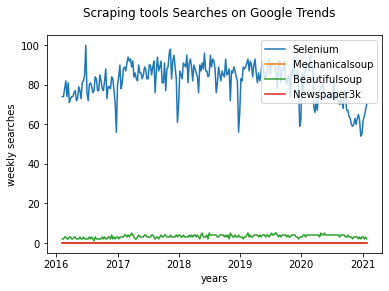

<Figure size 432x288 with 0 Axes>

In [58]:
import matplotlib.pyplot as plt

#plot data
plt.plot(data)

#add titles
plt.suptitle('Scraping tools Searches on Google Trends')
plt.xlabel('years')                       
plt.ylabel('weekly searches')  

#add legend
plt.legend(keywords, loc='upper right')

plt.show()
plt.savefig('best_Scraping_tools.png')

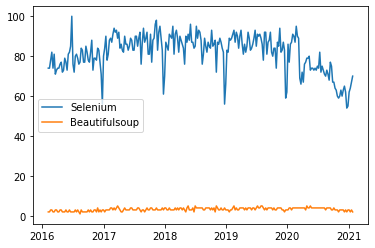

In [59]:
#compain technique popularity
focus = ['Selenium', 'Beautifulsoup'] 

plt.plot(data[focus])
plt.legend(focus)

## What are the top countries searching for Selenium

In [60]:
import pandas as pd

#extract country-level kewords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "Selenium"
data2 = country_data['Selenium'].nlargest(20)

#convert to dataframe
data2 = data2.to_frame()

data2

,Selenium
geoName,
Albania,100
Algeria,100
Armenia,100
Azerbaijan,100
Bahamas,100
Bahrain,100
Barbados,100
Bolivia,100
Bosnia & Herzegovina,100


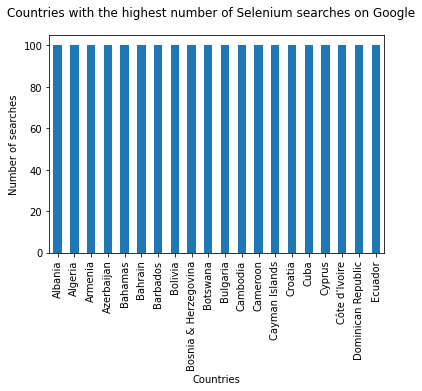

In [61]:
#plot a bar chart
data2.plot(kind='bar', legend=None)

#titles
plt.suptitle('Countries with the highest number of Selenium searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Countries')

plt.show()

In [62]:
data3 = country_data[220:230]
data3

,Selenium,Mechanicalsoup,Beautifulsoup,Newspaper3k
geoName,,,,
Thailand,95,0,5,0
Timor-Leste,0,0,0,0
Togo,0,0,0,0
Tokelau,0,0,0,0
Tonga,0,0,0,0
Trinidad & Tobago,100,0,0,0
Tunisia,100,0,0,0
Turkey,96,0,4,0
Turkmenistan,0,0,0,0


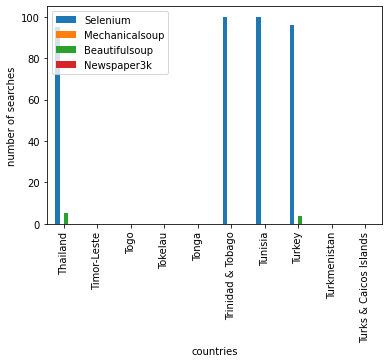

In [63]:
#plot bar chart
data3.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()